In [5]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [66]:
employee_data = pd.read_excel("hrdata.xls")

In [67]:
employee_data.head()

,age,co_education,gender,work_experience,education,place,diversity_rating,Classifier
0,18-20,No,Female,0-2,Below SSLC,Town,2.92,0
1,21-30,Yes,Female,10-15,SSLC,Town,3.46,1
2,31-40,No,Male,5-10,SSLC,Town,2.69,0
3,31-40,Yes,Male,5-10,HSC,Town,3.15,1
4,21-30,Yes,Female,2-5,HSC,Town,3.31,1


In [68]:
features = employee_data[['age', 'co_education','gender', 'work_experience', 'education', 'place']]
label = employee_data['Classifier']

In [69]:
age_map = {'18-20':1, '21-30':2, '31-40':3, 'More than 40': 4}
co_education_map = {'Yes':1, 'No':0}
gender_map = {'Female':1, 'Male':0}
work_experience_map = {'0-2':1, '0-5':2, '10-15':3, '2-5':4, '5-10':5, '6-10':6, 'More than 15':7}
education_map = {'Below SSLC':1, 'HSC':2, 'SSLC':3, 'Under Graduate':4}
place_map = {'City':1, 'Town':2, 'Village':3}

In [70]:
features.loc[:,'age'].replace(to_replace = age_map, inplace = True)
features.loc[:,'co_education'].replace(to_replace = co_education_map, inplace = True)
features.loc[:,'gender'].replace(to_replace = gender_map, inplace = True)
features.loc[:,'work_experience'].replace(to_replace = work_experience_map, inplace = True)
features.loc[:,'education'].replace(to_replace = education_map, inplace = True)
features.loc[:,'place'].replace(to_replace = place_map, inplace = True)

c:\Users\ganesh\Anaconda3\lib\site-packages\pandas\core\series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [71]:
features

,age,co_education,gender,work_experience,education,place
0,1,0,1,1,1,2
1,2,1,1,3,3,2
2,3,0,0,5,3,2
3,3,1,0,5,2,2
4,2,1,1,4,2,2
...,...,...,...,...,...,...
152,3,1,1,3,4,2
153,2,1,0,2,4,2
154,4,0,1,7,4,1
155,3,1,1,6,4,2


<AxesSubplot:>

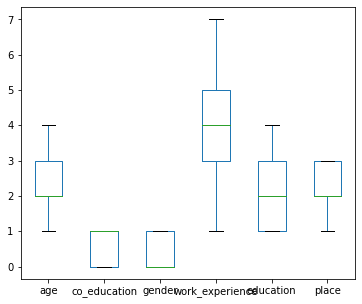

In [72]:
features.plot(kind='box', figsize=(6,5))

### Normalising

In [73]:
from sklearn.preprocessing import normalize
features = normalize(features)

In [74]:
features

array([[0.35355339, 0.        , 0.35355339, 0.35355339, 0.35355339,
        0.70710678],
       [0.37796447, 0.18898224, 0.18898224, 0.56694671, 0.56694671,
        0.37796447],
       [0.43759497, 0.        , 0.        , 0.72932496, 0.43759497,
        0.29172998],
       [0.45749571, 0.15249857, 0.        , 0.76249285, 0.30499714,
        0.30499714],
       [0.36514837, 0.18257419, 0.18257419, 0.73029674, 0.36514837,
        0.36514837],
       [0.45883147, 0.        , 0.11470787, 0.80295507, 0.11470787,
        0.3441236 ],
       [0.37139068, 0.        , 0.18569534, 0.74278135, 0.37139068,
        0.37139068],
       [0.30151134, 0.        , 0.30151134, 0.30151134, 0.60302269,
        0.60302269],
       [0.36514837, 0.18257419, 0.18257419, 0.73029674, 0.36514837,
        0.36514837],
       [0.4330127 , 0.        , 0.14433757, 0.72168784, 0.28867513,
        0.4330127 ],
       [0.51639778, 0.25819889, 0.25819889, 0.25819889, 0.51639778,
        0.51639778],
       [0.2236068 , 0

In [75]:
X = np.array(features)
y = np.array(label)

In [76]:
X.shape, y.shape

((157, 6), (157,))

In [77]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2)

In [78]:
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((125, 6), (32, 6), (125,), (32,))

In [79]:
svc = svm.SVC()

In [80]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [81]:
y_test

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [82]:
y_pred = regressor.predict(X_test)
print(y_pred.shape, y_test.shape)
from sklearn.metrics import accuracy_score
accuracy_score(np.round(y_test), np.round(y_pred))

(32,) (32,)


0.625

In [83]:
from sklearn.linear_model import LinearRegression
regressorLinear = LinearRegression()
regressorLinear.fit(X_train, y_train)

LinearRegression()

In [84]:
y_pred = regressorLinear.predict(X_test)
print(y_pred.shape, y_test.shape)
accuracy_score(np.round(y_test), np.round(y_pred))

(32,) (32,)


0.5625